### Jupyter Superpower — Interactive Visualization Combo with Python
https://towardsdatascience.com/jupyter-superpower-interactive-visualization-combo-with-python-ffc0adb37b7b#6af7

#### Ipywidgets#### 
ipywidgets allows you to interact with Jupyter Notebook/Lab with your mouse, it makes Jupyter Notebook almost looks like a little app itself. You can add Slicer, Button, and Checkbox inside a notebook. Here are some nice projects that use ipywidgets.

In [13]:
import ipywidgets
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import sys
from pathlib import Path
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:

df = pd.read_csv('C:\\Users\\MRM\\Desktop\\IBM_Python_Data_Science_Coursera\\Articulos_de_Medium\\Plotly_and_Matplotlib_Seaborn_Altair_Articles\\Gallery-master\\data\\ae_data.csv',encoding='utf8')
df.head()

,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm


In [15]:
df['topWaitTime'] = df['topWait'].copy()
df['topWaitTime']  = df['topWaitTime'].str.replace('> ', '')
df['topWaitTime'][df['topWaitTime']== '< 1'] = 0.5
df['topWaitTime'] = df['topWaitTime'].fillna(0)
df['topWaitTime'] = df['topWaitTime'].astype(float)

C:\Users\MRM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df_mean = df[['topWaitTime','hospNameEn']].groupby(['hospNameEn']).mean()
df_mean

,topWaitTime
hospNameEn,
Alice Ho Miu Ling Nethersole Hospital,1.639167
Caritas Medical Centre,1.424722
Kwong Wah Hospital,3.183787
North District Hospital,3.089722
North Lantau Hospital,0.795114
Pamela Youde Nethersole Eastern Hospital,2.487785
Pok Oi Hospital,1.764444
Prince of Wales Hospital,4.174722
Princess Margaret Hospital,2.698056


In [18]:
df_mean = df_mean.reset_index()
df_mean.head()

,hospNameEn,topWaitTime
0,Alice Ho Miu Ling Nethersole Hospital,1.639167
1,Caritas Medical Centre,1.424722
2,Kwong Wah Hospital,3.183787
3,North District Hospital,3.089722
4,North Lantau Hospital,0.795114


In [19]:
@ipywidgets.interact
def plot(color=['red','steelblue']):
         (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=df_mean,
             orient='h',
             color=color)
 .set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital'))

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

Text(0.5, 1.0, 'Average waiting Time of Accident & Emergency waiting Time in HK Hospital')

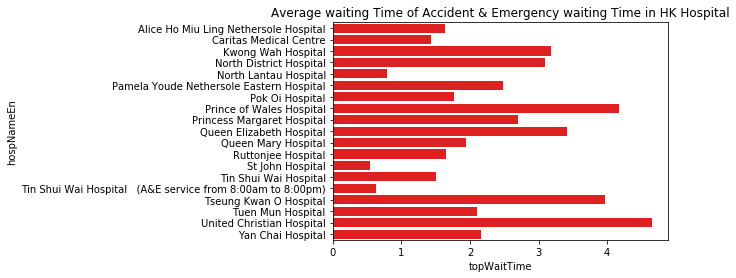

In [20]:
(sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=df_mean,
             orient='h',
             color='red')
 .set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital'))

#### qgrid
qgrid let you have an Excel-like table inside Jupyter Notebook/Lab, under the hood, it makes uses of ipywidgets. This is extremely useful when you are trying to understand your data, instead of typing a lot of code, you can sort your data with a click, filter some data temporarily with one click. It’s just awesome!

In [21]:
import qgrid
import pandas as pd
from pathlib import Path
import seaborn as sns

In [28]:
df = pd.read_csv('C:\\Users\\MRM\\Desktop\\IBM_Python_Data_Science_Coursera\\Articulos_de_Medium\\Plotly_and_Matplotlib_Seaborn_Altair_Articles\\Gallery-master\\data\\ae_data.csv',encoding='utf8')
df.head()

,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm


In [29]:
df['topWaitTime'] = df['topWait'].copy()
df['topWaitTime']  = df['topWaitTime'].str.replace('> ', '')
df['topWaitTime'][df['topWaitTime']== '< 1'] = 0.5
df['topWaitTime'] = df['topWaitTime'].fillna(0)
df['topWaitTime'] = df['topWaitTime'].astype(float)
df.head()

C:\Users\MRM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,seq,topWait,hospTime,hospCoord,hospUrlB5,hospUrlEn,hospUrlGb,pastHours,hospNameB5,hospNameEn,hospNameGb,hospTimeEn,topWaitTime
0,QMH 21/2/2019 9:00am,HK-02,> 2,2019-02-21T09:00:09.29,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 9:00am,2.0
1,AHN 21/2/2019 10:00am,NT-01,> 1,2019-02-21T10:00:01.783,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 10:00am,1.0
2,QMH 21/2/2019 11:00am,HK-02,> 1,2019-02-21T11:00:11.893,POINT(114.131259 22.270695),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,瑪麗醫院,Queen Mary Hospital,玛丽医院,21/2/2019 11:00am,1.0
3,AHN 21/2/2019 12:00pm,NT-01,> 1,2019-02-21T12:00:02.256,POINT(114.17472 22.458575),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,雅麗氏何妙齡那打素醫院,Alice Ho Miu Ling Nethersole Hospital,雅丽氏何妙龄那打素医院,21/2/2019 12:00pm,1.0
4,PYN 21/2/2019 12:00pm,HK-01,> 3,2019-02-21T12:00:01.646,POINT(114.235707 22.269419),http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,http://www.ha.org.hk/visitor/ha_visitor_index....,3,東區尤德夫人那打素醫院,Pamela Youde Nethersole Eastern Hospital,东区尤德夫人那打素医院,21/2/2019 12:00pm,3.0


In [30]:
widget = qgrid.show_grid(df)

In [31]:
# After upgrading to 1.0.3
def handle_json_updated(event, qgrid_widget):
    # exclude 'viewport_changed' events since that doesn't change the DataFrame
    if (event['triggered_by'] != 'viewport_changed'):
        print(qgrid_widget.get_changed_df())
    (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=widget.get_changed_df(),
             orient='h',
             color='red'))
    print(123)
    
    
widget.on('filter_changed', handle_json_updated)

In [32]:
widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

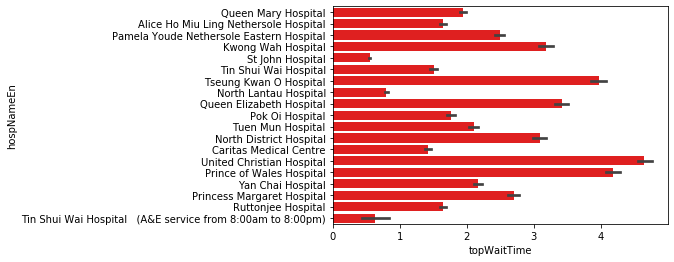

In [33]:
fig = (sns.barplot(y='hospNameEn',
             x='topWaitTime',
             data=widget.get_changed_df(),
             orient='h',
             color='red'))
# fig = fig.set_title('Average waiting Time of Accident & Emergency waiting Time in HK Hospital')

In [34]:
fig

In [35]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'],index=list(range(9)),dtype='datetime64[ns]'),
    'C' : pd.Series(randn(9),index=list(range(9)),dtype='float32'),
    'D' : np.array([3] * 9,dtype='int32'),
    'E' : pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'F' : ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['G'] = df_types['F'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<IPython.core.display.Javascript object>


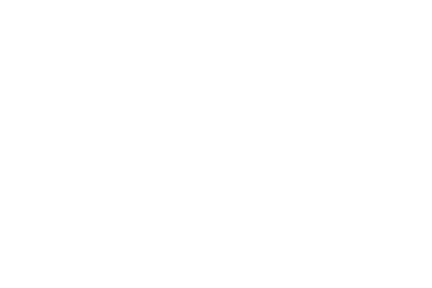

<IPython.core.display.Javascript object>


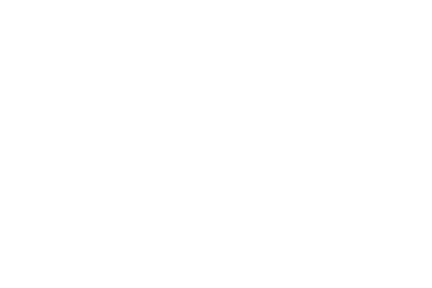

In [38]:
%matplotlib nbagg
import matplotlib.pyplot as plt

n = 50

qgrid_df = qgrid_widget.get_changed_df()
x = qgrid_df.index
y = qgrid_df['C']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
line, = ax.plot(x, fit[0] * x + fit[1], color='red')
scatter, = ax.plot(x,y,ms=8,color='b',marker='o',ls='')

def handle_filter_changed(event, widget):
    qgrid_df = qgrid_widget.get_changed_df()
    x = qgrid_df.index
    y = qgrid_df['C']
    fit = np.polyfit(x, y, deg=1)
    line.set_data(x, fit[0] * x + fit[1])
    fig.canvas.draw()
    scatter.set_data(x, y)
    fig.canvas.draw()

qgrid_widget.on('filter_changed', handle_filter_changed)